# Generate configuration file

Generate hardware and software configuration files
* **Hardware configuration file**: configure the hardware (neurons, synapses, ion channels, monitoring)
* **Software configuration file**: configure the C++ application (monitoring, stimulation, control)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
1
   # CONFIG EXC SYNs RATIO [%]  WSYN NMDA     μRS
0  250519_5              80/20          1  0.0255
250519_5


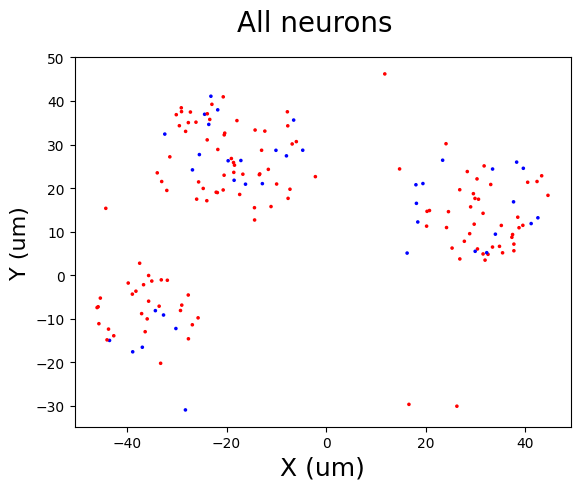

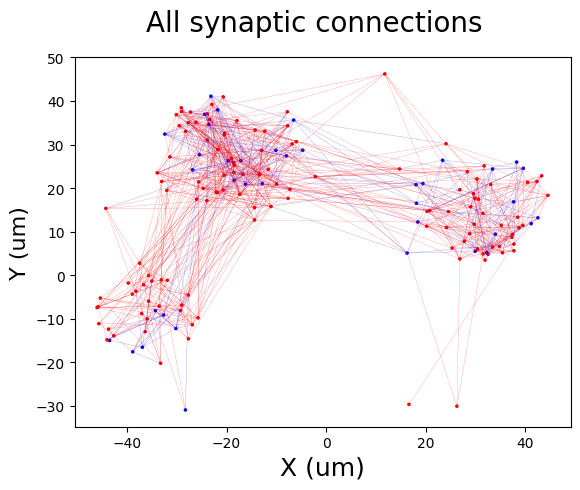

[1.0999999999999999, 0.19, 0.35, 0.0, 0.072, 0.0066, 0.3, 0.0, 5.0, 0.18, 0.25, -80.0, 0.09, 0.0012, 0.005625, 0.0010625, 1.0, -95]
Software configuration file saved at: export/CONFIG250519_5 SNN1\swconfig_CONFIG250519_5SW.json
Hardware configuration file saved at: export/CONFIG250519_5 SNN1\hwconfig_CONFIG250519_5SW.txt


In [10]:
%load_ext autoreload
%autoreload 2

import os, os.path
import shutil
from configuration.gen_config import gen_config
import numpy as np
import pandas as pd

INPUT_CONFIG_FILE = pd.read_excel('./input config/inputConfigs.xlsx',"Feuil1",nrows=1)
print(len(INPUT_CONFIG_FILE))
print(INPUT_CONFIG_FILE)

for iconfig in INPUT_CONFIG_FILE['# CONFIG']:
    config_param = INPUT_CONFIG_FILE[INPUT_CONFIG_FILE['# CONFIG'] == iconfig]
    
    print(iconfig)
    
    # Configuration file 
    NCONFIG = str(iconfig)            # <EDIT>

    # Stimulation
    STIM_ENABLE = True
    STIM_DEL_MS = 0
    STIM_DUR_MS = 100

    for itrial in range(1):    # <EDIT>

        # Configuration file 
        NTRIAL = str(itrial+1)                                      
        CONFIG_NAME = "CONFIG"+NCONFIG+"SW"   # <EDIT>
        SAVE_PATH   = "export/CONFIG"+NCONFIG+" SNN"+NTRIAL
        os.makedirs(SAVE_PATH)

        np.random.seed(333)
        [hwconfig, swconfig] = gen_config(CONFIG_NAME, SAVE_PATH, STIM_ENABLE, STIM_DEL_MS, STIM_DUR_MS, config_param)

csourcefolder = './export'
cdestfolder = './export/exportexport'
for foldname in os.listdir(csourcefolder):
    if 'CONFIG' in foldname:
        for confFileName in os.listdir(os.path.join(csourcefolder,foldname)):
            if 'wconfig_' in confFileName:
                shutil.copy2(os.path.join(csourcefolder,foldname,confFileName), os.path.join(cdestfolder,confFileName))

# Emulate configuration

* Emulate using the configuration files generated

In [ ]:
import numpy as np
from emulation.emulate_config import emulate_config

NEURON_LIST   = [i for i in range(4)]
FPGA_EMU      = False
STORE_CONTEXT = True

exact_emu = emulate_config(hwconfig, swconfig, NEURON_LIST, False, STORE_CONTEXT, dtype=np.float64)

if FPGA_EMU:
    fpga_emu = emulate_config(hwconfig, swconfig, NEURON_LIST, True,  STORE_CONTEXT, dtype=np.float32)

* Plot emulation

In [ ]:
%matplotlib qt
from emulation.plots.SnnPlotter import *

NEURON_TO_DISPLAY       = 0
NEURON_LIST_TO_DISPLAY  = [0,1,2,3]

exact_plotter = SnnPlotter(exact_emu)
exact_plotter.plotIonRates()
exact_plotter.plotSynRates()
exact_plotter.plotIonChanStates(NEURON_TO_DISPLAY)
exact_plotter.plotCurrents(NEURON_TO_DISPLAY)
# exact_plotter.plotVmem(NEURON_LIST_TO_DISPLAY, plot_type='all')
exact_plotter.plotVmem(NEURON_LIST_TO_DISPLAY, plot_type='comp')
exact_plotter.plotVmem(NEURON_LIST_TO_DISPLAY, plot_type='subplot')
exact_plotter.plotRaster()

# Monitoring

* Monitor spikes

In [ ]:
import monitoring.spkmon.main as spike_monitor
spike_monitor.main()

* Monitor waves

In [ ]:
import monitoring.vmon.main as vmem_monitor
vmem_monitor.main()

* External stimulation

In [ ]:
import monitoring.ext_stim.main as external_stim
external_stim.main()

Start producer


# Analysis

* Raster

In [2]:
%matplotlib qt
from analysis.draw_raster import draw_raster
from analysis.extract_spikes import extract_spikes
from analysis.spike_analysis import spike_analysis
from analysis.burst_analysis import burst_analysis

DIRPATH        = "data/"
RASTER_LIST    = ["CONFIG250529_1SW", "CONFIG250529_2SW", "CONFIG250529_3SW", "CONFIG250529_4SW", "CONFIG250529_5SW"]
REC_DURATION_S = 1
SAVE_FIGS      = False

draw_raster(DIRPATH, RASTER_LIST, SAVE_FIGS)

tstamp_list = extract_spikes(DIRPATH, RASTER_LIST, REC_DURATION_S)
spike_analysis(RASTER_LIST, tstamp_list, REC_DURATION_S)
burst_analysis(RASTER_LIST, tstamp_list)

FileNotFoundError: data/raster_CONFIG250529_1SW.csv not found.

* Waveforms

In [ ]:
%matplotlib qt
from analysis.draw_waves import draw_waves

DIRPATH        = "data/"
WAVE_LIST      = ["test1", "test2"]
PLOT_TIME_S    = 0.1
SEL_NRN        = [i for i in range(2)] # up to MAX_NB_NEURONS_WAVES_MON
SAVE_FIGS      = False

draw_waves(DIRPATH, WAVE_LIST, PLOT_TIME_S, SEL_NRN)
